# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

print(df)

          p1         p2
0   6.964692   7.943428
1   2.861393   5.099537
2   2.268515   0.974429
3   5.513148   4.474359
4   7.194690   8.938402
5   4.231065   3.433002
6   9.807642   9.837325
7   6.848297   7.917613
8   4.809319   5.700025
9   3.921175   5.676061
10  3.431780   4.927424
11  7.290497   8.359890
12  4.385722   3.613014
13  0.596779   1.391642
14  3.980443   4.294715
15  7.379954   6.053689
16  1.824917   3.242216
17  1.754518   2.561754
18  5.315514   5.361004
19  5.318276   5.085184
20  6.344010   5.145708
21  8.494318   8.693842
22  7.244553   7.712992
23  6.110235   5.279080
24  7.224434   8.386638
25  3.229589   2.132386
26  3.617887   1.494786
27  2.282632   3.322359
28  2.937140   2.533774
29  6.309761   6.183732
30  0.921049   0.083533
31  4.337012   2.731049
32  4.308628   5.563865
33  4.936851   4.247982
34  4.258303   5.919255
35  3.122612   3.929920
36  4.263513   3.948755
37  8.933892   7.847989
38  9.441600   8.709138
39  5.018367   3.805844
40  6.239530   8

In [4]:
# Matrizes de tranformação
transformada_med = 1/2 * np.array([[1, 1]])
transformada_dif = 1/2 * np.array([[1, -1]])

# Calculo da diferença e media
resultado_med = transformada_med @ np.vstack([p1.T, p2.T])
resultado_dif = transformada_dif @ np.vstack([p1.T, p2.T])

# Resultados
print("Média:", resultado_med)
print("Diferença:", resultado_dif)

Média: [[7.45405986 3.98046502 1.62147187 4.99375359 8.06654581 3.83203323
  9.8224836  7.38295537 5.25467221 4.79861827 4.17960223 7.82519341
  3.99936809 0.9942103  4.13757855 6.71682133 2.53356683 2.15813583
  5.33825878 5.20172984 5.74485901 8.59407998 7.47877281 5.69465761
  7.80553585 2.68098762 2.55633638 2.80249585 2.73545744 6.24674645
  0.50229104 3.53403035 4.93624632 4.59241648 5.08877915 3.52626632
  4.106134   8.39094043 9.07536919 4.41210519 7.2830862  1.23840457
  3.74795759 3.5145861  8.75360914 3.09348462 4.66283726 9.92779893
  4.65256724 5.44720949]]
Diferença: [[-0.489368   -1.11907167  0.64704266  0.51939411 -0.87185611  0.39903137
  -0.01484162 -0.53465798 -0.4453532  -0.87744309 -0.74782207 -0.53469633
   0.38635436 -0.39743133 -0.157136    0.66313273 -0.70864952 -0.40361827
  -0.02274504  0.11654603  0.59915057 -0.09976204 -0.23421956  0.41557749
  -0.58110202  0.54860152  1.06155018 -0.51986355  0.20168302  0.06301479
   0.41875836  0.80298138 -0.62761869  0.3

In [11]:
# Correlação entre as variáveis p1 e p2
correlacao_coef = np.corrcoef(p1.flatten(), p2.flatten())[0, 1]
print("Correlação entre P1 e P2:", correlacao_coef)

Correlação entre P1 e P2: 0.8957365818728046


In [14]:
# Correlação entre os dados da média e da diferença
correlacao_coef_trans = np.corrcoef(resultado_med.flatten(), resultado_dif.flatten())[0, 1]
print("Correlação entre a média e diferença de P1 e P2:", correlacao_coef_trans)

Correlação entre a média e diferença de P1 e P2: -0.13347385411788837


A correlação entre P1 e P2, que está aproximadamente em 0,8957. Indica que uma correlação forte, portanto é possível dizer que quando uma das notas aumente a outra tende a aumentar a uma taxa elevada.

A correlação entre a média e a diferença mostrou uma correlação de -0,1334. Indicando uma correlação negativa e bem menor que a anteerior. Portanto a medida que uma variável aumente a outra tende a diminuir, em uma taxa bem menor.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

Soma das Notas: [[14.90811972  7.96093004  3.24294375  9.98750717 16.13309162  7.66406647
  19.6449672  14.76591074 10.50934442  9.59723655  8.35920446 15.65038682
   7.99873618  1.9884206   8.2751571  13.43364265  5.06713366  4.31627166
  10.67651756 10.40345968 11.48971803 17.18815996 14.95754562 11.38931523
  15.6110717   5.36197523  5.11267276  5.60499171  5.47091489 12.49349289
   1.00458208  7.06806069  9.87249264  9.18483297 10.17755829  7.05253265
   8.21226799 16.78188086 18.15073838  8.82421039 14.5661724   2.47680913
   7.49591518  7.02917219 17.50721829  6.18696925  9.32567452 19.85559786
   9.30513447 10.89441897]]


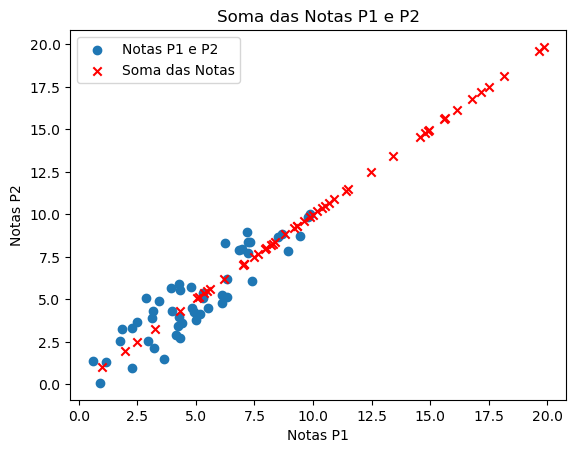

In [7]:
# Matriz de transformação para a soma
sum_transform = np.array([[1, 1]])

# Calculo da soma
sum_result = sum_transform @ np.vstack([p1.T, p2.T])

print("Soma das Notas:", sum_result)

# Construir gráfico
plt.scatter(p1, p2, label='Notas P1 e P2')
plt.scatter(sum_result[0], sum_result[0], color='red', marker='x', label='Soma das Notas')
plt.title('Soma das Notas P1 e P2')
plt.xlabel('Notas P1')
plt.ylabel('Notas P2')
plt.legend()
plt.show()